In [81]:
import pandas as pd
df = pd.read_csv("F:\Budget_-_2026_Budget_Recommendations_-_Revenue.csv", engine = 'python')

In [82]:
df.head()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
0,0100,Corporate Fund,Intergovernmental Revenue,Municipal Auto Rental Tax,Municipal Auto Rental Tax,4894443
1,0100,Corporate Fund,Intergovernmental Revenue,Personal Property Replacement Tax,Personal Property Replacement Tax,202567148
2,0100,Corporate Fund,Intergovernmental Revenue,Reimbursements for City Services,Reimbursements for City Services,1143491
3,0100,Corporate Fund,Intergovernmental Revenue,State Income Tax,State Income Tax,545129731
4,0100,Corporate Fund,Local Non-Tax Revenue,"Licenses, Permits, and Certificates",Alcohol Dealers' License,17328661


In [83]:
df.describe(include = 'all')

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
count,154,154,52,52,154,1.540000e+02
unique,37,37,4,19,100,NaN
top,0100,Corporate Fund,Local Tax,Recreation Taxes,Interest,NaN
freq,52,52,24,9,8,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.313196e+07
std,NaN,NaN,NaN,NaN,NaN,2.281755e+08
min,NaN,NaN,NaN,NaN,NaN,9.800000e+03
25%,NaN,NaN,NaN,NaN,NaN,3.525925e+06
50%,NaN,NaN,NaN,NaN,NaN,1.447063e+07
75%,NaN,NaN,NaN,NaN,NaN,6.424702e+07


In [84]:
df.index

RangeIndex(start=0, stop=154, step=1)

In [85]:
df.columns

Index(['FUND_CODE', 'FUND_NAME', 'REVENUE_GROUP_TYPE', 'REVENUE_CATEGORY',
       'REVENUE_SOURCE', 'ESTIMATED_REVENUE'],
      dtype='object')

In [12]:
# There are null values in revenue group type and revenue category.
df.isnull().sum()

FUND_CODE               0
FUND_NAME               0
REVENUE_GROUP_TYPE    102
REVENUE_CATEGORY      102
REVENUE_SOURCE          0
ESTIMATED_REVENUE       0
dtype: int64

In [16]:
df['REVENUE_GROUP_TYPE'].isnull().tail()

149    True
150    True
151    True
152    True
153    True
Name: REVENUE_GROUP_TYPE, dtype: bool

In [17]:
df.tail()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
149,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Building Permits,2787098
150,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Interest,1795086
151,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Land Sale Proceeds,3767510
152,0D44,Citywide Adopt-a-landmark Fund,NaN,NaN,Building Permits,395145
153,0D45,Local Impact Fund,NaN,NaN,Building Permits,395145


In [18]:
# Filling null values with Unknown 
df['REVENUE_GROUP_TYPE'] = df['REVENUE_GROUP_TYPE'].fillna('Unknown')
df['REVENUE_CATEGORY'] = df['REVENUE_CATEGORY'].fillna('Unknown')

In [19]:
df.isnull().sum()

FUND_CODE             0
FUND_NAME             0
REVENUE_GROUP_TYPE    0
REVENUE_CATEGORY      0
REVENUE_SOURCE        0
ESTIMATED_REVENUE     0
dtype: int64

In [25]:
# Duplicate values
df.duplicated().sum()

np.int64(0)

In [26]:
# Unique Values
df.nunique()

FUND_CODE              37
FUND_NAME              37
REVENUE_GROUP_TYPE      5
REVENUE_CATEGORY       20
REVENUE_SOURCE        100
ESTIMATED_REVENUE     152
dtype: int64

In [113]:
# Top 10 revenue soures and ther estimate revenue
fund_rhigh = df.groupby('REVENUE_SOURCE')['ESTIMATED_REVENUE'].sum().sort_values(ascending = False).head(10)
print(fund_rhigh)
fund_rlow = df.groupby('REVENUE_SOURCE')['ESTIMATED_REVENUE'].sum().sort_values(ascending = True).head(10)
print(fund_rlow)

REVENUE_SOURCE
Total From Rates and Charges                     2482460153
Property Tax Levy (Net Abatement)                1839721000
Lease of Personal Property                       1152139380
Water Rates                                       859329000
Corporate Fund Pension Allocation                 688395301
State Income Tax                                  545129731
Sales Tax Securitization Corporation Residual     492698094
Sewer Rates                                       413441884
Fines, Forfeitures and Penalties                  389508480
Safety                                            384868887
Name: ESTIMATED_REVENUE, dtype: int64
REVENUE_SOURCE
Vaping Settlement                       108675
Rental of Facilities                    160000
Cable Programming Fee                   500000
Vacation of Streets and Alleys          697076
Auto Amusement Tax                      856040
Motor Vehicle Lessor Tax                932734
Reimbursements for City Services       1143491
Mid

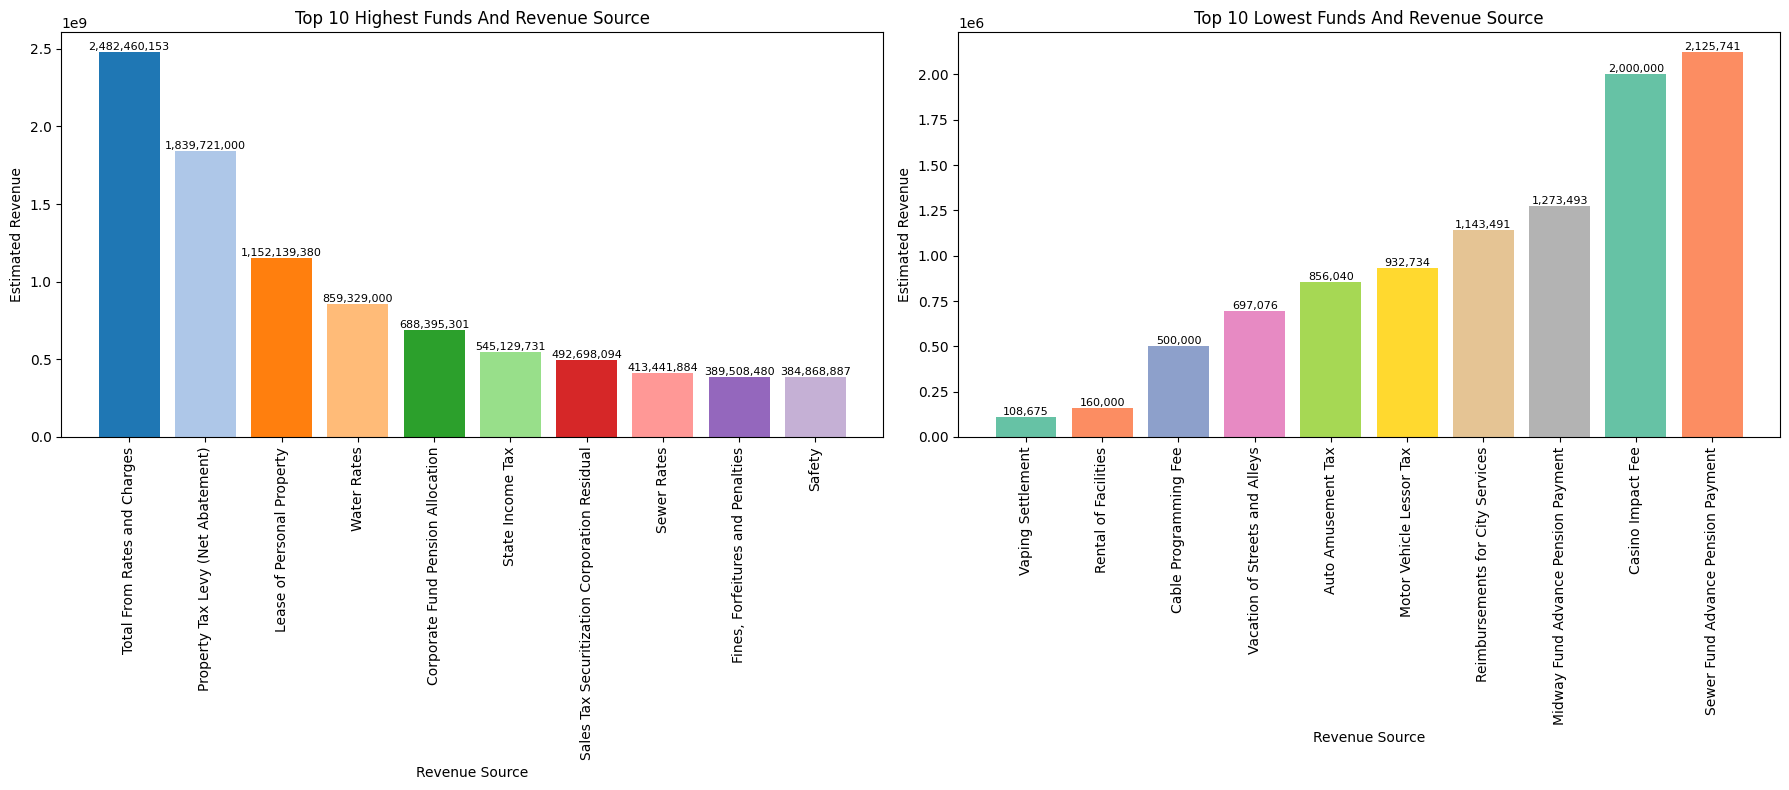

In [116]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(18,8))

colmap = plt.get_cmap('tab20')
axs[0].bar(fund_rhigh.index, fund_rhigh.values, color=colmap.colors)
axs[0].set_title('Top 10 Highest Funds And Revenue Source')
axs[0].set_xlabel('Revenue Source')
axs[0].set_ylabel('Estimated Revenue')
axs[0].tick_params(axis='x', rotation=90)
for i, v in enumerate(fund_rhigh.values):
    axs[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)


colmap = plt.get_cmap('Set2')
axs[1].bar(fund_rlow.index, fund_rlow.values, color=colmap.colors)
axs[1].set_title('Top 10 Lowest Funds And Revenue Source')
axs[1].set_xlabel('Revenue Source')
axs[1].set_ylabel('Estimated Revenue')
axs[1].tick_params(axis='x', rotation=90)
for i, v in enumerate(fund_rlow.values):
    axs[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


- There are top 10 highest and lowest funds source and their estimate revenue. 

In [106]:
fund_high = df.groupby('FUND_NAME')['ESTIMATED_REVENUE'].sum().sort_values(ascending = False).head(10)

fund_low = df.groupby('FUND_NAME')['ESTIMATED_REVENUE'].sum().sort_values(ascending = True).head(10)


FUND_NAME
Corporate Fund                                   6060381617
Chicago O'Hare Airport Fund                      2052773766
Policemen's Annuity and Benefit Fund             1106262515
Municipal Employees' Annuity and Benefit Fund    1046708718
Water Fund                                        921572538
Firemen's Annuity and Benefit Fund                461787994
Sewer Fund                                        437646334
Bond Redemption and Interest Series Fund          430103270
Chicago Midway Airport Fund                       429686387
Vehicle Tax Fund                                  276873145
Name: ESTIMATED_REVENUE, dtype: int64
FUND_NAME
Controlled Substances Fund                              62560
Vaping Settlement Fund                                 108675
Construction and Demolition Debris Management Fund     387751
Citywide Adopt-a-landmark Fund                         395145
Local Impact Fund                                      395145
Cable Local Origination Fund    

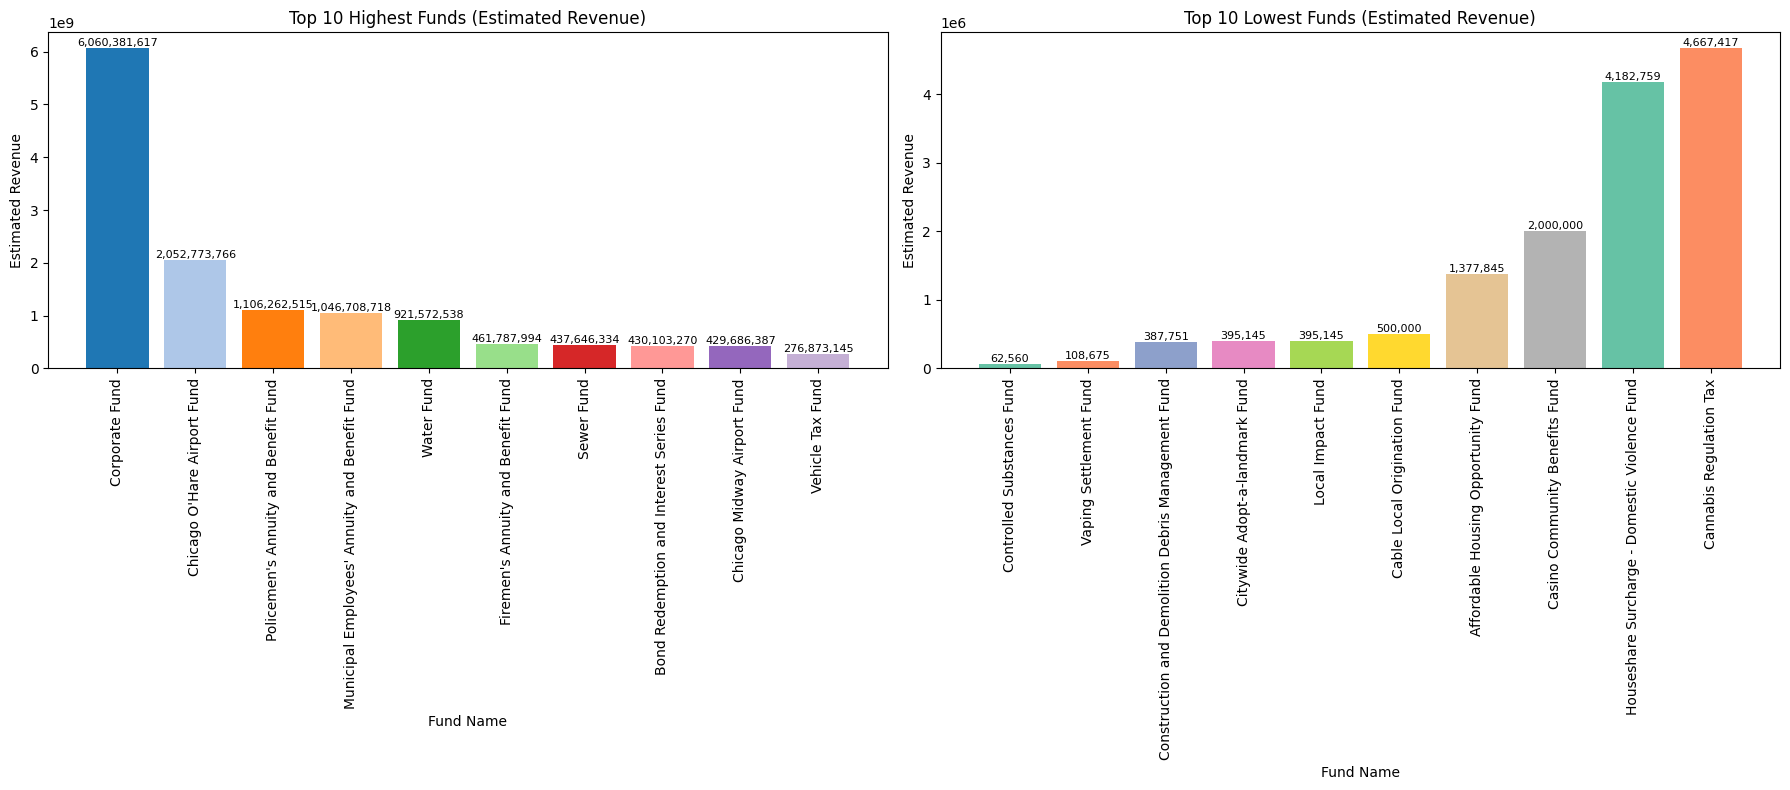

In [110]:

fig, axs = plt.subplots(1, 2, figsize=(18,8))

colmap = plt.get_cmap('tab20')
axs[0].bar(fund_high.index, fund_high.values, color=colmap.colors)
axs[0].set_title('Top 10 Highest Funds And Estimate Revenue')
axs[0].set_xlabel('Fund Name')
axs[0].set_ylabel('Estimated Revenue')
axs[0].tick_params(axis='x', rotation=90)
for i, v in enumerate(fund_high.values):
    axs[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)


colmap = plt.get_cmap('Set2')
axs[1].bar(fund_low.index, fund_low.values, color=colmap.colors)
axs[1].set_title('Top 10 Lowest Funds And Estimate Revenue')
axs[1].set_xlabel('Fund Name')
axs[1].set_ylabel('Estimated Revenue')
axs[1].tick_params(axis='x', rotation=90)
for i, v in enumerate(fund_low.values):
    axs[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


- There are top 10 highest and lowest funds and their estimate revenues.

In [72]:
# Estimated Revenue By Group Type
df['REVENUE_GROUP_TYPE'].value_counts()

REVENUE_GROUP_TYPE
Unknown                      102
Local Tax                     24
Local Non-Tax Revenue         22
Intergovernmental Revenue      4
Proceeds and Transfers In      2
Name: count, dtype: int64

In [112]:
fund_g = df.groupby('FUND_NAME')['ESTIMATED_REVENUE'].sum().sort_values(ascending=False).head(10)
print(fund_g)

FUND_NAME
Corporate Fund                                   6060381617
Chicago O'Hare Airport Fund                      2052773766
Policemen's Annuity and Benefit Fund             1106262515
Municipal Employees' Annuity and Benefit Fund    1046708718
Water Fund                                        921572538
Firemen's Annuity and Benefit Fund                461787994
Sewer Fund                                        437646334
Bond Redemption and Interest Series Fund          430103270
Chicago Midway Airport Fund                       429686387
Vehicle Tax Fund                                  276873145
Name: ESTIMATED_REVENUE, dtype: int64


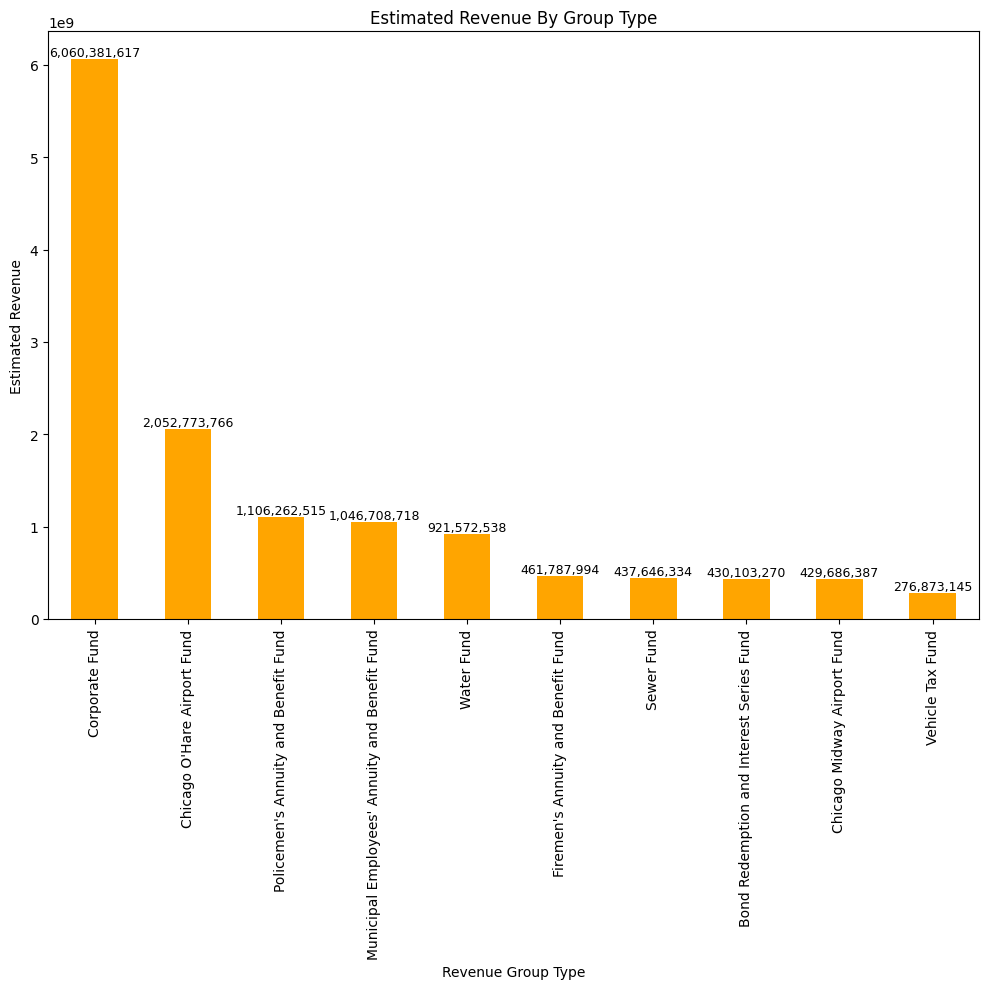

In [117]:
plt.figure(figsize=(10,10))
fund_g.plot(kind='bar', color='orange')

plt.title('Estimated Revenue By Group Type')
plt.xlabel('Revenue Group Type')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=90)


for i, v in enumerate(fund_g): 
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


- There are Revenue Groups Types Those are high contrubute in estimate revenue.

In [98]:
# Fund names and Their revenue sources.
fund_rs = df.groupby('FUND_NAME')['REVENUE_SOURCE'].nunique().sort_values(ascending = False).head(17)
print(fund_rs)

FUND_NAME
Corporate Fund                                                       52
Municipal Employees' Annuity and Benefit Fund                        16
Laborers' and Retirement Board Annuity and Benefit Fund              11
Firemen's Annuity and Benefit Fund                                    8
Policemen's Annuity and Benefit Fund                                  8
Vehicle Tax Fund                                                      6
Library Fund                                                          5
Water Fund                                                            4
Special Events and Municipal Hotel Operators' Occupation Tax Fund     4
Sewer Fund                                                            4
Bond Redemption and Interest Series Fund                              3
Neighborhoods Opportunity Fund                                        3
Affordable Housing Opportunity Fund                                   2
Wheelchair Accessible Vehicle Fund                    

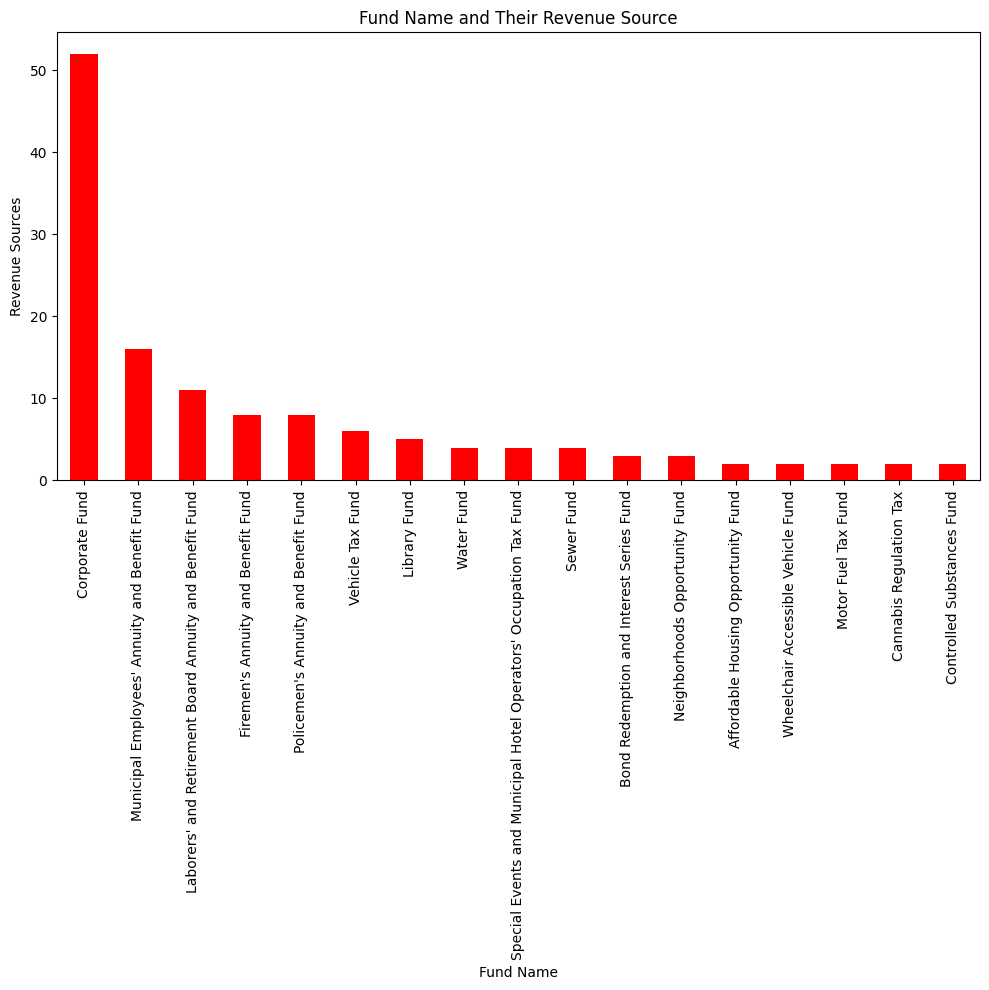

In [100]:
plt.figure(figsize=(10,10))
fund_rs.plot(kind='bar', color='red')

plt.title('Fund Name and Their Revenue Source') 
plt.xlabel('Fund Name')
plt.ylabel('Revenue Sources')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- There are 17 funds have more than 1 revenue source , means this funds have multiple revenue resources.
- That couse this funds contribute more income in estimate revenue.

In [27]:
df.head()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
0,0100,Corporate Fund,Intergovernmental Revenue,Municipal Auto Rental Tax,Municipal Auto Rental Tax,4894443
1,0100,Corporate Fund,Intergovernmental Revenue,Personal Property Replacement Tax,Personal Property Replacement Tax,202567148
2,0100,Corporate Fund,Intergovernmental Revenue,Reimbursements for City Services,Reimbursements for City Services,1143491
3,0100,Corporate Fund,Intergovernmental Revenue,State Income Tax,State Income Tax,545129731
4,0100,Corporate Fund,Local Non-Tax Revenue,"Licenses, Permits, and Certificates",Alcohol Dealers' License,17328661
